In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("skygeni_sales_data.csv")
df

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won
1,D00002,2023-01-17,2023-01-27,rep_7,SaaS,India,Core,Referral,Closed,3905,10,Won
2,D00003,2023-10-29,2023-12-10,rep_5,HealthTech,APAC,Core,Inbound,Proposal,10615,42,Lost
3,D00004,2023-07-14,2023-08-02,rep_18,FinTech,India,Core,Partner,Negotiation,4817,19,Won
4,D00005,2024-02-29,2024-05-26,rep_2,HealthTech,APAC,Core,Outbound,Qualified,45203,87,Lost
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,D04996,2023-10-17,2023-12-03,rep_13,Ecommerce,North America,Enterprise,Partner,Closed,2586,47,Lost
4996,D04997,2023-11-11,2023-12-09,rep_20,FinTech,APAC,Core,Referral,Closed,10589,28,Lost
4997,D04998,2023-10-19,2023-10-27,rep_24,FinTech,North America,Core,Inbound,Negotiation,57434,8,Won
4998,D04999,2023-03-12,2023-05-18,rep_21,SaaS,APAC,Enterprise,Inbound,Proposal,50717,67,Won


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   deal_id           5000 non-null   object
 1   created_date      5000 non-null   object
 2   closed_date       5000 non-null   object
 3   sales_rep_id      5000 non-null   object
 4   industry          5000 non-null   object
 5   region            5000 non-null   object
 6   product_type      5000 non-null   object
 7   lead_source       5000 non-null   object
 8   deal_stage        5000 non-null   object
 9   deal_amount       5000 non-null   int64 
 10  sales_cycle_days  5000 non-null   int64 
 11  outcome           5000 non-null   object
dtypes: int64(2), object(10)
memory usage: 468.9+ KB


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df['created_date']=pd.to_datetime(df['created_date'])
df['closed_date']=pd.to_datetime(df['closed_date'])

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
deal_id,5000,5000,D05000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_date,5000,NaN,NaN,NaN,2023-08-14 06:10:56.640000,2023-01-01 00:00:00,2023-04-22 00:00:00,2023-08-14 00:00:00,2023-12-06 00:00:00,2024-03-26 00:00:00,NaN
closed_date,5000,NaN,NaN,NaN,2023-10-17 00:13:32.160000,2023-01-11 00:00:00,2023-06-26 00:00:00,2023-10-15 00:00:00,2024-02-08 00:00:00,2024-07-20 00:00:00,NaN
sales_rep_id,5000,25,rep_20,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
industry,5000,5,Ecommerce,1060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,5000,4,India,1286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_type,5000,3,Core,1694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_source,5000,4,Inbound,1262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deal_stage,5000,5,Demo,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deal_amount,5000.0,NaN,NaN,NaN,26286.4928,2002.0,6611.0,14171.5,39062.25,100000.0,27689.230136


The dataset contains 5,000 clean B2B deals spanning January 2023 to July 2024.

The average deal size is 26K USD, while the median is 14K USD, indicating a right-skewed revenue distribution, and most deals fall between 6k USD and 39k USD. A small number of high-value enterprise deals significantly influencing overall revenue.

The average sales cycle is ~64 days, showing a structured and consistent sales process.

Ecommerce is the highest-volume industry segment.

India has the largest deal volume among regions, making it a key geographic market.

The Core product drives the majority of the sales pipeline.

Inbound leads generate the highest deal volume, highlighting strong marketing performance.

#### Revenue Analysis

In [7]:
# Total Revenue (Won Deals Only)
won_df = df[df['outcome'] == 'Won']
total_revenue = won_df['deal_amount'].sum()
print(total_revenue)                                            # total revenue from won deals is 60M USD

60589278


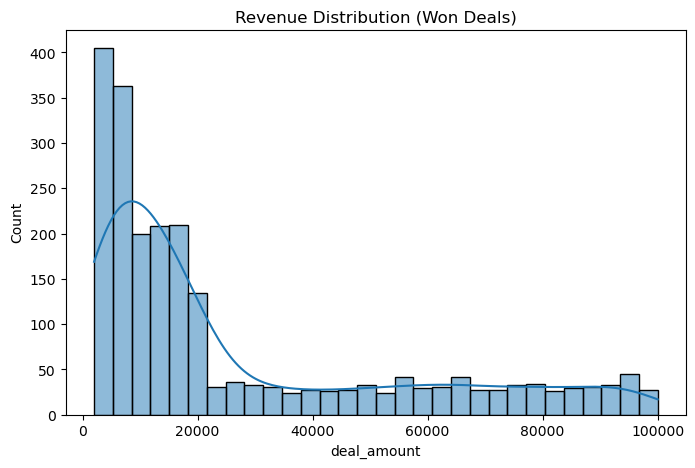

In [8]:
# Revenue Distribution
plt.figure(figsize=(8,5))
sns.histplot(won_df['deal_amount'], bins=30, kde=True)
plt.title("Revenue Distribution (Won Deals)")
plt.show()


The revenue distribution of won deals is right-skewed, indicating that most deals are small to mid-sized while a few large enterprise deals contribute disproportionately to total revenue. This suggests revenue concentration risk, where losing a small number of high-value deals could significantly impact overall performance.

#### Win Rate Analysis

In [9]:
# Overall Win Rate
df['outcome'].value_counts(normalize=True) * 100        #Win rate is ~45%.

outcome
Lost    54.74
Won     45.26
Name: proportion, dtype: float64

In [10]:
# Win Rate by Industry
pd.crosstab(df['industry'], df['outcome'], normalize='index') * 100

outcome,Lost,Won
industry,,
Ecommerce,55.094340,44.905660
EdTech,55.846774,44.153226
FinTech,52.294557,47.705443
HealthTech,55.445545,44.554455
SaaS,54.845155,45.154845


#### Industry performance

In [11]:
# Revenue by Industry
won_df.groupby('industry')['deal_amount'].sum().sort_values(ascending=False)

industry
Ecommerce     13427177
SaaS          11906059
EdTech        11856688
FinTech       11794278
HealthTech    11605076
Name: deal_amount, dtype: int64

In [12]:
# Avg Deal Size by Industry
df.groupby('industry')['deal_amount'].mean().sort_values(ascending=False)

industry
EdTech        27346.715726
Ecommerce     26626.355660
SaaS          26502.002997
FinTech       25759.661686
HealthTech    25163.640594
Name: deal_amount, dtype: float64

#### Regional Analysis

In [13]:
# Revenue by Region
won_df.groupby('region')['deal_amount'].sum().sort_values(ascending=False)

region
India            16259158
Europe           15113948
APAC             15031817
North America    14184355
Name: deal_amount, dtype: int64

In [14]:
# Win Rate by Region
pd.crosstab(df['region'], df['outcome'], normalize='index') * 100

outcome,Lost,Won
region,,
APAC,55.072464,44.927536
Europe,54.420114,45.579886
India,54.276827,45.723173
North America,55.205811,44.794189


#### Product Analysis

In [15]:
# Revenue by Product
won_df.groupby('product_type')['deal_amount'].sum()


product_type
Core          20690550
Enterprise    18856936
Pro           21041792
Name: deal_amount, dtype: int64

In [16]:
# Win Rate by Product
pd.crosstab(df['product_type'], df['outcome'], normalize='index') * 100


outcome,Lost,Won
product_type,,
Core,54.486423,45.513577
Enterprise,55.030675,44.969325
Pro,54.713604,45.286396


The business demonstrates balanced revenue distribution across industries, regions, and products, reducing concentration risk. FinTech shows the highest win rate, while Ecommerce contributes the highest total revenue. EdTech has the highest average deal size but relatively lower conversion, presenting an opportunity for targeted improvement. Regional performance is consistent, indicating standardized sales execution globally.

#### Lead Source Performance

In [17]:
# Revenue by Lead Source
won_df.groupby('lead_source')['deal_amount'].sum()


lead_source
Inbound     16116715
Outbound    14092571
Partner     14129539
Referral    16250453
Name: deal_amount, dtype: int64

In [18]:
# Win Rate by Lead Source
pd.crosstab(df['lead_source'], df['outcome'], normalize='index') * 100


outcome,Lost,Won
lead_source,,
Inbound,53.961965,46.038035
Outbound,54.494382,45.505618
Partner,56.048387,43.951613
Referral,54.472843,45.527157


In [19]:
# Sales Cycle by Lead Source
df.groupby('lead_source')['sales_cycle_days'].mean()


lead_source
Inbound     63.682250
Outbound    64.902087
Partner     61.968548
Referral    64.443291
Name: sales_cycle_days, dtype: float64

#### Sales Rep Performance


In [20]:
# Top Revenue Reps
won_df.groupby('sales_rep_id')['deal_amount'].sum().sort_values(ascending=False)


sales_rep_id
rep_2     3132288
rep_20    3122765
rep_11    2902021
rep_16    2845827
rep_21    2699769
rep_19    2680384
rep_25    2659022
rep_3     2596557
rep_5     2584495
rep_14    2553897
rep_13    2552878
rep_1     2482988
rep_4     2445940
rep_8     2395880
rep_12    2386301
rep_9     2338125
rep_17    2323722
rep_6     2251800
rep_23    2121727
rep_24    2032706
rep_22    1967063
rep_10    1945769
rep_18    1925536
rep_7     1902358
rep_15    1739460
Name: deal_amount, dtype: int64

In [21]:
# Best Win Rate Reps
pd.crosstab(df['sales_rep_id'], df['outcome'], normalize='index') * 100


outcome,Lost,Won
sales_rep_id,,
rep_1,54.502370,45.497630
rep_10,57.591623,42.408377
rep_11,53.500000,46.500000
rep_12,51.666667,48.333333
rep_13,55.897436,44.102564
rep_14,56.038647,43.961353
rep_15,55.428571,44.571429
rep_16,52.914798,47.085202
rep_17,55.428571,44.571429


#### Sales Cycle Analysis

In [22]:
# Correlation Between Deal Size & Sales Cycle
df[['deal_amount', 'sales_cycle_days']].corr()


,deal_amount,sales_cycle_days
deal_amount,1.000000,0.020536
sales_cycle_days,0.020536,1.000000


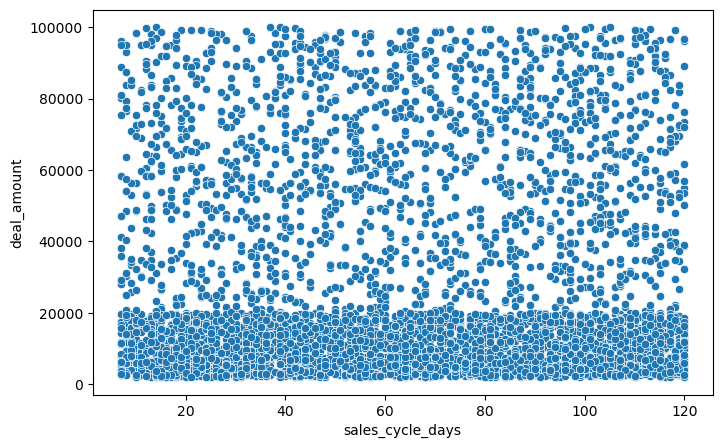

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='sales_cycle_days', y='deal_amount', data=df)
plt.show()


Revenue is well distributed across industries, regions, products, and lead sources, reducing concentration risk. Referral and Inbound channels generate the highest revenue and win rates, indicating strong marketing effectiveness. Sales rep performance varies significantly, suggesting opportunities for coaching and optimization. There is no strong relationship between deal size and sales cycle duration, indicating a consistent sales process across deal tiers.

#### Time-Based Analysis

C:\Users\admin\AppData\Local\Temp\ipykernel_10796\1948025165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  won_df['month'] = won_df['closed_date'].dt.to_period('M')


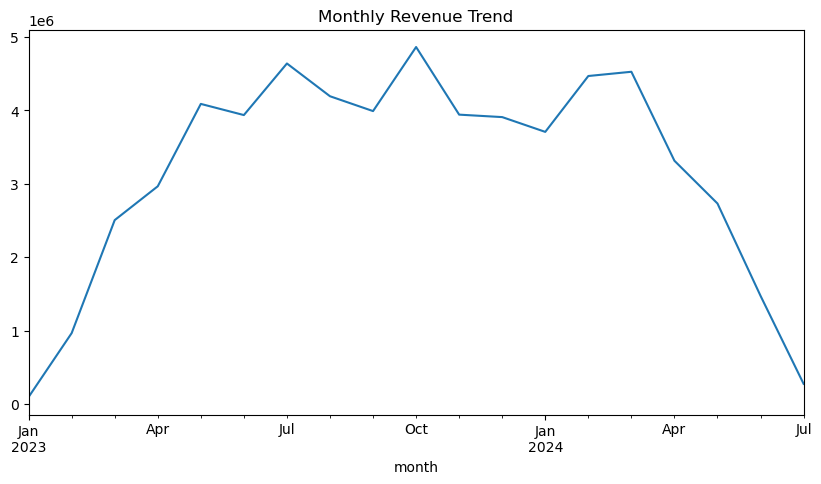

In [24]:
# Monthly Revenue Trend
won_df['month'] = won_df['closed_date'].dt.to_period('M')
monthly_revenue = won_df.groupby('month')['deal_amount'].sum()

monthly_revenue.plot(figsize=(10,5))
plt.title("Monthly Revenue Trend")
plt.show()


In [25]:
# Deal Size by Outcome
df.groupby('outcome')['deal_amount'].mean()


outcome
Lost    25883.516989
Won     26773.874503
Name: deal_amount, dtype: float64

Monthly revenue shows strong growth throughout 2023, peaking in Q4, followed by moderate fluctuations in 2024. The sharp decline in the most recent month is likely due to incomplete data. Average deal size for won deals 26.8K USD is slightly higher than lost deals 25.9K USD, indicating that larger deals are not negatively impacting win probability.

### Win Probability Prediction (Win Rate Driver Analysis)

Business Problem: Sales team wants to know "Which deals are more likely to close and why?"

Goal: Build a model that Predicts probability of winning a deal and Identifies key drivers, Produces actionable insights.

#### Data Preparation

In [26]:
# Convert Target Variable to 1's and 0's
df['won_flag'] = df['outcome'].map({'Won': 1, 'Lost': 0})


In [27]:
# Select only meaningful predictors/features
features = [
    'deal_amount',
    'sales_cycle_days',
    'industry',
    'region',
    'product_type',
    'lead_source'
]

X = df[features]
y = df['won_flag']


To Avoid Data Leakage: Only variables available before a deal is closed were used. Fields like closed_date or final deal_stage could indirectly reveal the outcome and artificially inflate model performance.

To Reduce Overfitting Risk: With 5,000 records, adding too many categorical variables or identifiers (e.g., deal_id, raw sales_rep_id) could increase noise and reduce generalization.

To Ensure Real-World Usability: The model should work at the time a deal is active. Therefore, only actionable and pre-decision features (deal amount, industry, region, product type, lead source, sales cycle) were included.

In [28]:
# One-Hot Encode Categorical Variables
X = pd.get_dummies(X, drop_first=True)


In [29]:
from sklearn.model_selection import train_test_split     # split the dataset train and test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [30]:
# Logistic Regression model building and evaluating its performance
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

from sklearn.metrics import classification_report, roc_auc_score

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.56      0.98      0.71       560
           1       0.45      0.02      0.04       440

    accuracy                           0.56      1000
   macro avg       0.51      0.50      0.38      1000
weighted avg       0.51      0.56      0.42      1000

ROC-AUC: 0.49467938311688314


Why Logistic Regression Was Chosen:

Logistic Regression was selected as the baseline model because it is simple, interpretable, and well-suited for binary classification problems like win vs. loss prediction. It allows us to clearly understand how each feature impacts win probability through its coefficients. Given the structured tabular nature of the dataset and the moderate sample size (~5,000 records), Logistic Regression provides a strong, transparent starting point before exploring more complex models.

In [31]:
# Interpreting Feature Importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coefficients


,Feature,Coefficient
7,region_India,0.065754
3,industry_FinTech,0.063304
8,region_North America,0.043448
6,region_Europe,0.031671
13,lead_source_Referral,0.029908
9,product_type_Enterprise,0.009153
10,product_type_Pro,0.000101
0,deal_amount,0.000002
1,sales_cycle_days,-0.001199
11,lead_source_Outbound,-0.008453


In [32]:
# Creating Decision Engine Layer
df['win_probability'] = log_model.predict_proba(X)[:, 1]

def segment(prob):
    if prob > 0.7:
        return "High Probability"
    elif prob > 0.4:
        return "Medium Probability"
    else:
        return "Low Probability"

df['win_segment'] = df['win_probability'].apply(segment)




In [33]:
df.groupby('win_segment')['deal_amount'].sum()


win_segment
Low Probability           18622
Medium Probability    131413842
Name: deal_amount, dtype: int64

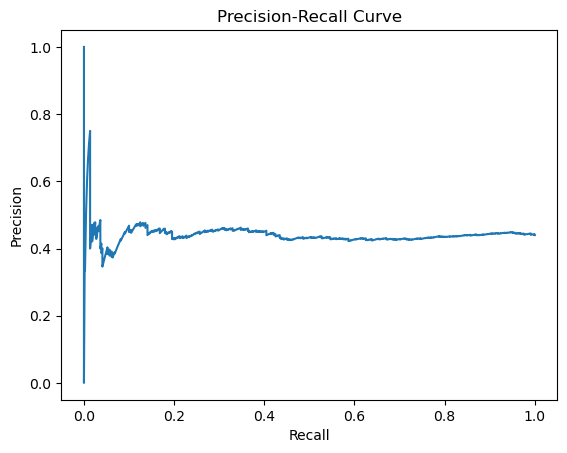

In [35]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

import matplotlib.pyplot as plt

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


The Precision-Recall curve remains nearly flat, with precision close to the base win rate across recall levels. This indicates that the model lacks meaningful discriminative power. Adjusting classification thresholds does not materially improve performance, confirming that structured deal attributes do not strongly determine win probability.

The logistic regression model achieved limited predictive performance (ROC-AUC ≈ 0.49), suggesting that available structured features do not strongly determine deal outcome/The features in this dataset are not strong drivers of win probability(The outcome is close to random with respect to these variables). This indicates that win probability may be influenced by unobserved variables such as rep skill, pricing strategy, or competitive dynamics. Win probability cannot be meaningfully predicted using current structured features.